In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Settings
import warnings
warnings.filterwarnings("ignore")


Load DataSet

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014.0,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87.0,0.0,14.0,1593721.0,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,2.0,257167501.0,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,11.0,224071816.0,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023.0,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,260084653.0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,33.0,253771913.0,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Viewing Dataset

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         17438 non-null  object 
 1   County                                             17435 non-null  object 
 2   City                                               17435 non-null  object 
 3   State                                              17437 non-null  object 
 4   Postal Code                                        17435 non-null  float64
 5   Model Year                                         17437 non-null  float64
 6   Make                                               17437 non-null  object 
 7   Model                                              17437 non-null  object 
 8   Electric Vehicle Type                              17437 non-null  object 
 9   Clean 

In [4]:
df.describe(include="all")


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,17438,17435,17435,17437,17435.000000,17437.000000,17437,17437,17437,17437,17437.000000,17437.000000,17435.000000,1.743700e+04,17435,17435,1.743500e+04
unique,4709,19,130,3,NaN,NaN,36,122,2,3,NaN,NaN,NaN,NaN,193,21,NaN
top,7SAYGDEEXP,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,124,13224,3276,17435,NaN,NaN,7845,3331,13593,8720,NaN,NaN,NaN,NaN,1254,9308,NaN
mean,NaN,NaN,NaN,NaN,98176.569372,2020.518380,NaN,NaN,NaN,NaN,61.181281,1113.569995,32.503757,2.186337e+08,NaN,NaN,5.303321e+10
std,NaN,NaN,NaN,NaN,213.781260,2.925701,NaN,NaN,NaN,NaN,93.065285,8393.780028,14.783902,7.657917e+07,NaN,NaN,1.130676e+07
min,NaN,NaN,NaN,NaN,98001.000000,2000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,5.300796e+10
25%,NaN,NaN,NaN,NaN,98034.000000,2019.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.812763e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98110.000000,2022.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,37.000000,2.272128e+08,NaN,NaN,5.303302e+10
75%,NaN,NaN,NaN,NaN,98188.000000,2023.000000,NaN,NaN,NaN,NaN,84.000000,0.000000,45.000000,2.510060e+08,NaN,NaN,5.303303e+10


In [5]:
print("Dataset shape:", df.shape)


Dataset shape: (17438, 17)


Handling the value that are missed

In [6]:
df.isnull().sum().sort_values(ascending=False)


,0
County,3
Vehicle Location,3
City,3
Postal Code,3
Legislative District,3
2020 Census Tract,3
Electric Utility,3
Electric Vehicle Type,1
State,1
Base MSRP,1


In [7]:
# Drop columns with large missing values
df = df.drop(columns=[
    "Legislative District",
    "Electric Utility",
    "2020 Census Tract"
])


In [8]:
# Drop remaining missing rows
df = df.dropna()
df.isnull().sum().sum()


np.int64(0)

Defining the Target

In [9]:
target = "Electric Vehicle Type"

X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (17435, 13)
y shape: (17435,)


distributing the target

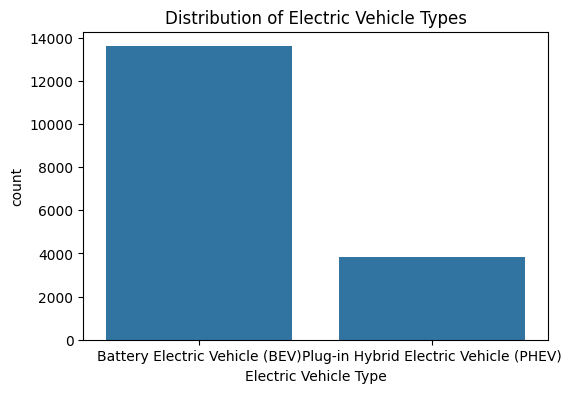

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=df)
plt.title("Distribution of Electric Vehicle Types")
plt.show()


model year distribution

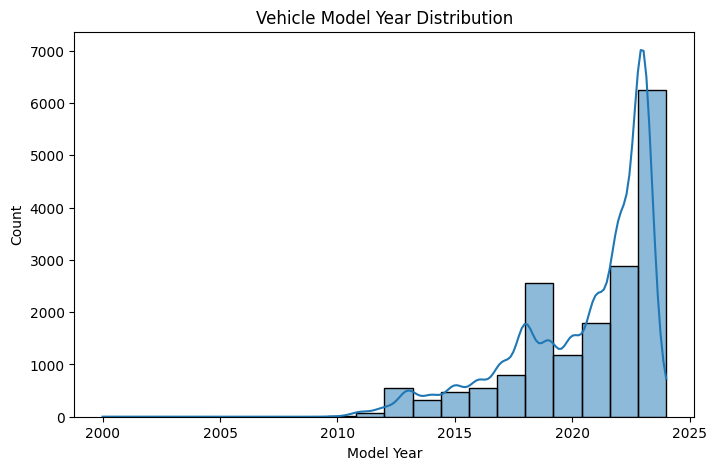

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Model Year"], bins=20, kde=True)
plt.title("Vehicle Model Year Distribution")
plt.show()


CAFV Eligibility vs EV Type

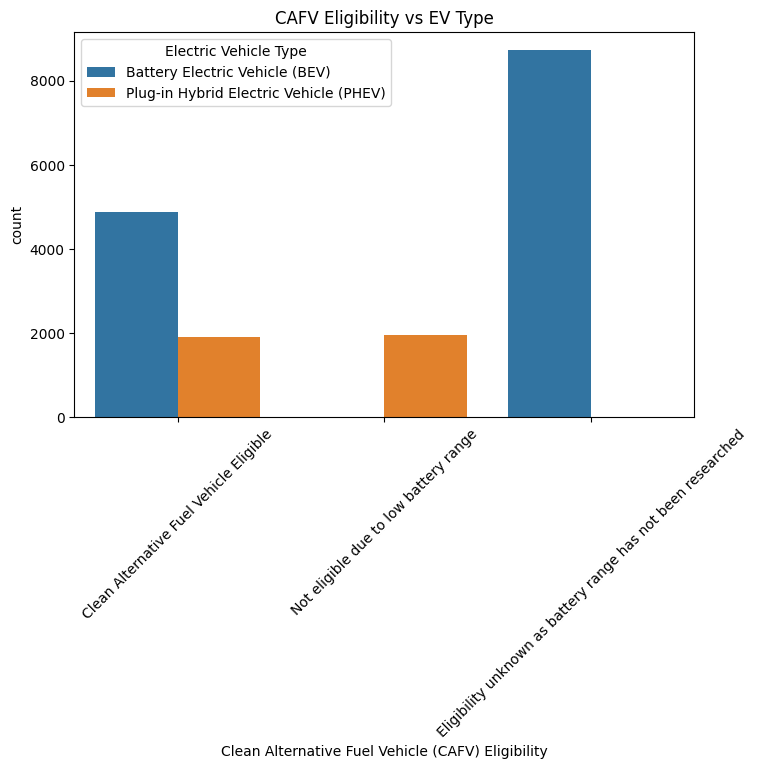

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(
    x="Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    hue=target,
    data=df
)
plt.xticks(rotation=45)
plt.title("CAFV Eligibility vs EV Type")
plt.show()


Encoding Categorical Features

In [14]:
X = pd.get_dummies(X, drop_first=True)
print("Encoded X shape:", X.shape)


Encoded X shape: (17435, 5209)


Train–Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


X_train: (13948, 5209)
X_test: (3487, 5209)


Feature Scaling

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model 1: Logistic Regression

In [17]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9968454258675079
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00      2718
Plug-in Hybrid Electric Vehicle (PHEV)       0.99      1.00      0.99       769

                              accuracy                           1.00      3487
                             macro avg       0.99      1.00      1.00      3487
                          weighted avg       1.00      1.00      1.00      3487



Model 2: Random Forest

In [20]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9965586464009177
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00      2718
Plug-in Hybrid Electric Vehicle (PHEV)       0.99      1.00      0.99       769

                              accuracy                           1.00      3487
                             macro avg       0.99      1.00      1.00      3487
                          weighted avg       1.00      1.00      1.00      3487



Hyperparameter Tuning

In [19]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.9919701749354746
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.99      1.00      0.99      2718
Plug-in Hybrid Electric Vehicle (PHEV)       1.00      0.97      0.98       769

                              accuracy                           0.99      3487
                             macro avg       0.99      0.98      0.99      3487
                          weighted avg       0.99      0.99      0.99      3487



In [21]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Feature Selection

In [22]:
importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
2,Electric Range,0.158385
5016,Clean Alternative Fuel Vehicle (CAFV) Eligibil...,0.140185
5015,Clean Alternative Fuel Vehicle (CAFV) Eligibil...,0.069391
4889,Make_TESLA,0.056414
1,Model Year,0.042978
5008,Model_VOLT,0.028957
4863,Make_CHRYSLER,0.025823
4974,Model_PACIFICA,0.023725
4891,Make_TOYOTA,0.021958
4860,Make_BMW,0.018883


In [23]:
selected_features = feature_importance_df[
    feature_importance_df["Importance"] > importances.mean()
]["Feature"]

X_selected = X[selected_features]


Final Model with Selected Features

In [24]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

best_rf.fit(X_train_s, y_train_s)
y_pred_final = best_rf.predict(X_test_s)

print("Final Tuned RF Accuracy:", accuracy_score(y_test_s, y_pred_final))
print(classification_report(y_test_s, y_pred_final))


Final Tuned RF Accuracy: 0.9979925437338687
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      1.00      1.00      2718
Plug-in Hybrid Electric Vehicle (PHEV)       0.99      1.00      1.00       769

                              accuracy                           1.00      3487
                             macro avg       1.00      1.00      1.00      3487
                          weighted avg       1.00      1.00      1.00      3487



Confusion Matrix

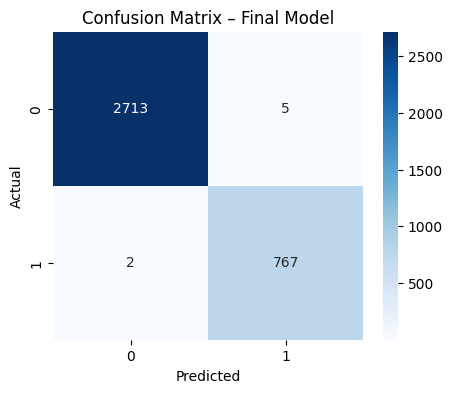

In [25]:
cm = confusion_matrix(y_test_s, y_pred_final)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Final Model Comparison Table

In [26]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Neural Network (MLP)",
        "Tuned Random Forest"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test_s, y_pred_final)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.996845
1,Random Forest,0.996559
2,Neural Network (MLP),0.991970
3,Tuned Random Forest,0.997993
